In [1]:
import gzip, json, random, pandas as pd
from Preprocessing import preprocessing as prep
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import model_selection
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_selection import chi2, SelectKBest, f_classif, f_regression, mutual_info_classif
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [2]:
amazon_input = '../Data/reviews_Cell_Phones_and_Accessories_5.json.gz'
data = []
with gzip.open(amazon_input) as f:
    for l in f:
        data.append(json.loads(l.strip()))
df = pd.DataFrame.from_dict(data)
ama_df = df[['reviewText', 'overall']]

In [131]:
(Counter(ama_df['overall']).items())

dict_items([(4.0, 39993), (5.0, 108664), (3.0, 21439), (1.0, 13279), (2.0, 11064)])

finished balancing
0.9137598468674077
0.9134076082278924
0.9126093707861258
              precision    recall  f1-score   support

         1.0       0.96      0.99      0.98     27183
         2.0       0.98      0.99      0.98     27018
         3.0       0.92      0.96      0.94     27259
         4.0       0.82      0.86      0.84     27271
         5.0       0.88      0.77      0.82     27099

    accuracy                           0.91    135830
   macro avg       0.91      0.91      0.91    135830
weighted avg       0.91      0.91      0.91    135830



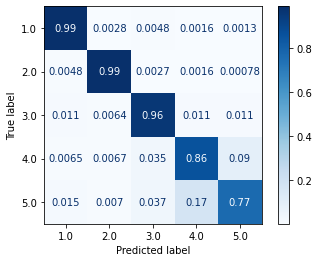

In [7]:
vectorizer = CountVectorizer(ngram_range=(1,3))
text_count = vectorizer.fit_transform(ama_df['reviewText'])
# ros = RandomOverSampler(random_state=777)
oversampler = RandomOverSampler(random_state=None)
text_count_res, target_res = oversampler.fit_sample(text_count, ama_df['overall'])
print("finished balancing")
clf = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(text_count_res, target_res, test_size=0.25, random_state=109)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = str(metrics.accuracy_score(y_test, y_pred))
precision = str(metrics.precision_score(y_test, y_pred, average="macro"))
f1 = str(metrics.f1_score(y_test, y_pred, average="macro"))
print(accuracy)
print(precision)
print(f1)
print(metrics.classification_report(y_test, y_pred, labels = [1.0, 2.0, 3.0, 4.0, 5.0]))
disp_norm = plot_confusion_matrix(clf, X_test, y_test,
                                      display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                      cmap=plt.cm.Blues,
                                      normalize='true')
vocab_1 = vectorizer.get_feature_names()

finished balancing
0.8751969373481557
0.8736458673130556
0.8737048470305968
              precision    recall  f1-score   support

         1.0       0.91      0.98      0.94     27183
         2.0       0.96      0.96      0.96     27018
         3.0       0.88      0.91      0.89     27259
         4.0       0.82      0.74      0.78     27271
         5.0       0.80      0.79      0.79     27099

    accuracy                           0.88    135830
   macro avg       0.87      0.88      0.87    135830
weighted avg       0.87      0.88      0.87    135830



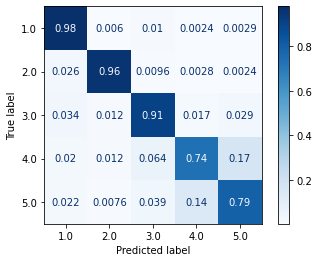

In [8]:
vectorizer = CountVectorizer(min_df=2, ngram_range=(1,3))
text_count = vectorizer.fit_transform(ama_df['reviewText'])
# ros = RandomOverSampler(random_state=777)
oversampler = RandomOverSampler(random_state=None)
text_count_res, target_res = oversampler.fit_sample(text_count, ama_df['overall'])
print("finished balancing")
clf = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(text_count_res, target_res, test_size=0.25, random_state=109)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = str(metrics.accuracy_score(y_test, y_pred))
precision = str(metrics.precision_score(y_test, y_pred, average="macro"))
f1 = str(metrics.f1_score(y_test, y_pred, average="macro"))
print(accuracy)
print(precision)
print(f1)
print(metrics.classification_report(y_test, y_pred, labels = [1.0, 2.0, 3.0, 4.0, 5.0]))
disp_norm = plot_confusion_matrix(clf, X_test, y_test,
                                      display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                      cmap=plt.cm.Blues,
                                      normalize='true')
vocab_2 = vectorizer.get_feature_names()

finished balancing
0.9188618125598175
0.918635374809004
0.9172825427592329
              precision    recall  f1-score   support

         1.0       0.96      0.99      0.98     27183
         2.0       0.97      0.99      0.98     27018
         3.0       0.92      0.97      0.95     27259
         4.0       0.84      0.88      0.86     27271
         5.0       0.90      0.76      0.82     27099

    accuracy                           0.92    135830
   macro avg       0.92      0.92      0.92    135830
weighted avg       0.92      0.92      0.92    135830



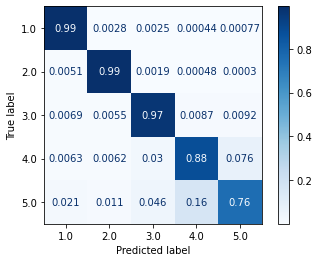

In [11]:
# WITH PREPROCESSING => IMPROVING PERFORMANCE
clean_text = prep.preprocess_reviews(ama_df['reviewText'])
vectorizer = CountVectorizer(ngram_range=(1,3))
text_count = vectorizer.fit_transform(clean_text)
# ros = RandomOverSampler(random_state=777)
oversampler = RandomOverSampler(random_state=None)
text_count_res, target_res = oversampler.fit_sample(text_count, ama_df['overall'])
print("finished balancing")
clf = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(text_count_res, target_res, test_size=0.25, random_state=109)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = str(metrics.accuracy_score(y_test, y_pred))
precision = str(metrics.precision_score(y_test, y_pred, average="macro"))
f1 = str(metrics.f1_score(y_test, y_pred, average="macro"))
print(accuracy)
print(precision)
print(f1)
print(metrics.classification_report(y_test, y_pred, labels = [1.0, 2.0, 3.0, 4.0, 5.0]))
disp_norm = plot_confusion_matrix(clf, X_test, y_test,
                                      display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                      cmap=plt.cm.Blues,
                                      normalize='true')
vocab_3 = vectorizer.get_feature_names()

In [13]:
# DIFFERENCE BETWEEN WITH AND WITHOUT MIN_DF
list(set(vocab_1) - set(vocab_2))

['heavier and unlike',
 'tried to rob',
 'show as with',
 'ultra cool design',
 'in colder states',
 'cutouts and raised',
 'quality of direct',
 'functions as great',
 'leaving specs of',
 'just spare my',
 'preset which',
 'desk lamp shining',
 'with 5pcs',
 'when traveled and',
 'dirt hair and',
 'due to text',
 'needed special app',
 'loading webpages opening',
 'what saying either',
 'expecting top level',
 'items this series',
 'better as this',
 'n860 because it',
 'as recieved this',
 'picture they provided',
 '93 03 protrudes',
 '25 of one',
 'press much preferred',
 'the 5mm tip',
 'far from reality',
 'orange wore',
 'the average mobile',
 'bth240 headset to',
 'basically similar to',
 '100 as intended',
 'some im not',
 'but gets tht',
 'of velvety',
 'adjustable angle',
 'together sometimes one',
 'both ways some',
 'tournaments this car',
 'when snagged',
 'placed me',
 'think just stick',
 'oriented so he',
 'are named the',
 'replace the point',
 'change two things',
 '

In [ ]:
# WITH PREPROCESSING AND FEATURE SELECTION
clean_text = prep.preprocess_reviews(ama_df['reviewText'])
vectorizer = CountVectorizer(ngram_range=(1,3))
text_count = vectorizer.fit_transform(clean_text)
# ros = RandomOverSampler(random_state=777)
oversampler = RandomOverSampler(random_state=None)
text_count_res, target_res = oversampler.fit_sample(text_count, ama_df['overall'])
print("finished balancing")
# clf = LogisticRegression(dual=False, random_state=0, solver='lbfgs', multi_class='multinomial')
# clf = SVC(decision_function_shape="ovo")
clf = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(text_count_res, target_res, test_size=0.25, random_state=109)
vectorizer_fs = SelectKBest(score_func=mutual_info_classif,k=5000)
chi_train_vectorized = vectorizer_fs.fit_transform(X_train,y_train)
chi_test_vectorized = vectorizer_fs.transform(X_test)
print("finished feature selection")
clf.fit(X_train, y_train)
print("finished training")
y_pred = clf.predict(X_test)
accuracy = str(metrics.accuracy_score(y_test, y_pred))
precision = str(metrics.precision_score(y_test, y_pred, average="macro"))
f1 = str(metrics.f1_score(y_test, y_pred, average="macro"))
print(accuracy)
print(precision)
print(f1)
print(metrics.classification_report(y_test, y_pred, labels = [1.0, 2.0, 3.0, 4.0, 5.0]))
disp_norm = plot_confusion_matrix(clf, X_test, y_test,
                                      display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                      cmap=plt.cm.Blues,
                                      normalize='true')
vocab_4 = vectorizer.get_feature_names()

In [ ]:
# Training target statistics: Counter({5.0: 18577, 4.0: 4243, 3.0: 993, 1.0: 246, 2.0: 243})

In [ ]:
df_1 = ama_df[ama_df['overall']==1.0].values.tolist()
df_2 = ama_df[ama_df['overall']==2.0].values.tolist()
df_3 = ama_df[ama_df['overall']==3.0].values.tolist()
df_4 = ama_df[ama_df['overall']==4.0].values.tolist()
df_5 = ama_df[ama_df['overall']==5.0].values.tolist()
df1 = random.sample(df_1, 10000)
df2 = random.sample(df_2, 10000)
df4 = random.sample(df_4, 10000)
df5 = random.sample(df_5, 10000)
df11 = pd.DataFrame(df1[1:], columns=['reviewText', 'overall'])
df12 = pd.DataFrame(df2[1:], columns=['reviewText', 'overall'])
df13 = pd.DataFrame(df3[1:], columns=['reviewText', 'overall'])
df14 = pd.DataFrame(df4[1:], columns=['reviewText', 'overall'])
df15 = pd.DataFrame(df5[1:], columns=['reviewText', 'overall'])
amazon = pd.concat([df11, df12, df13, df14, df15], ignore_index=True)
amazon.reset_index(drop=True)

text = amazon['reviewText']
target = amazon['overall']

In [ ]:
clean_text = pd.Series(prep.preprocess_reviews(text))

Training and prediction done
Training target statistics: Counter({0: 22796, 1: 22796})
Testing target statistics: Counter({0: 7600, 1: 7600})
train: 0.75/ test: 0.25
Accuracy:0.8533552631578948
Precision:0.8558551765779929
F1:0.8530972620451991
col_0         0     1
binarized            
0          6167  1433
1           796  6804


c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


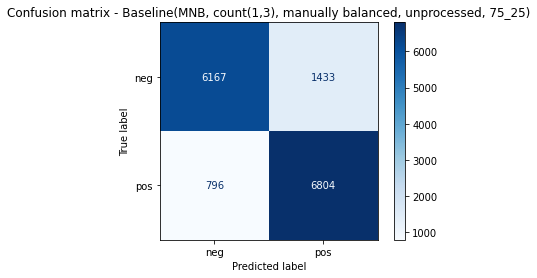

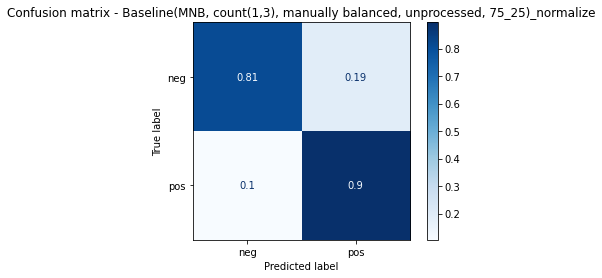

In [125]:
# BINARY CLASSIFICATION
X_train, X_test, y_train, y_test = train_test_split(clean_text, target, test_size=0.25,random_state=None)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

df_train['binarized'] = (df_train['overall'] < 2).astype(int)
df_test['binarized'] = (df_test['overall'] < 2).astype(int)

X_train = df_train[0]
X_test = df_test[0]
y_train = df_train['binarized']
y_test = df_test['binarized']

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
vectorizer = CountVectorizer(min_df=2 ,max_df=0.8, ngram_range=(1,3))

train_vectorized = vectorizer.fit_transform(X_train)
test_vectorized = vectorizer.transform(X_test)
train_vectorized, y_train = oversample.fit_sample(train_vectorized, y_train)
test_vectorized, y_test = oversample.fit_sample(test_vectorized, y_test)

vectorizer_fs = SelectKBest(score_func=f_regression,k=5000)
chi_train_vectorized = vectorizer_fs.fit_transform(train_vectorized,y_train)
chi_test_vectorized = vectorizer_fs.transform(test_vectorized)

clf = LogisticRegression(random_state=0, solver='lbfgs')

clf.fit(chi_train_vectorized, y_train)
y_pred = clf.predict(chi_test_vectorized)

print("Training and prediction done")
print('Training target statistics: {}'.format(Counter(y_train), sorted(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test), sorted(y_test)))

print("train: " + str(0.75) + "/ test: " + str(0.25))
accuracy = str(metrics.accuracy_score(y_test, y_pred))
precision = str(metrics.precision_score(y_test, y_pred, average="macro"))
f1 = str(metrics.f1_score(y_test, y_pred, average="macro"))
print("Accuracy:" + accuracy)
print("Precision:" + precision)
print("F1:" + f1)
print(pd.crosstab(y_test, y_pred))

# Visualization of Confusion Matrix and saving
plt.rcParams['figure.facecolor'] = 'white'
title = f"Confusion matrix - Baseline(MNB, count(1,3), manually balanced, unprocessed, 75_25)"
disp = plot_confusion_matrix(clf, chi_test_vectorized, y_test,
                             display_labels=['neg','pos'],
                             cmap=plt.cm.Blues)
disp.ax_.set_title(title)
plt.show()

title_norm = title + "_normalize"
disp_norm = plot_confusion_matrix(clf, chi_test_vectorized, y_test,
                             display_labels=['neg','pos'],
                             cmap=plt.cm.Blues,
                             normalize='true')
disp_norm.ax_.set_title(title_norm)
plt.show()

In [130]:
# WEIGHTED MULTICLASS
tfidf = TfidfVectorizer(min_df=5 , norm='l2', max_df=0.8, use_idf=True,sublinear_tf=True, ngram_range=(1,3))
features = tfidf.fit_transform(text)

labels = target
features.shape
X_train, X_test, y_train, y_test = train_test_split(clean_text, labels, train_size=0.75, random_state=0)

from sklearn.utils import class_weight
import numpy as np
my_class_weights = list(class_weight.compute_class_weight('balanced', np.unique(target), target))
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer(min_df=5 ,max_df=0.8, ngram_range=(1,3))
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# clf = LinearSVC(class_weight={1.0: .8798798798798799, 2.0:.8798798798798799, 3.0: 2.2030075187969924, 4.0:.8798798798798799, 5.0: .8798798798798799}, multi_class="crammer_singer").fit(X_train_tfidf, y_train)
clf = LinearSVC(class_weight={1.0: 0.2, 2.0:.2, 3.0: .5, 4.0:.15, 5.0: .15}, multi_class="crammer_singer").fit(X_train_counts, y_train)
y_pred = clf.predict(count_vect.transform(X_test))
print(metrics.classification_report(y_test, y_pred, labels = [1.0, 2.0, 3.0, 4.0, 5.0]))

c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass classes=[1. 2. 3. 4. 5.], y=0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
40390    5.0
40391    5.0
40392    5.0
40393    5.0
40394    5.0
Name: overall, Length: 40395, dtype: float64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

         1.0       0.59      0.62      0.61      2493
         2.0       0.47      0.46      0.47      2470
         3.0       0.04      0.02      0.03        97
         4.0       0.52      0.49      0.51      2539
         5.0       0.61      0.65      0.63      2500

    accuracy                           0.55     10099
   macro avg       0.45      0.45      0.45     10099
weighted avg       0.54      0.55      0.55     10099



In [112]:
print(my_class_weights)

[0.8798798798798799, 0.8798798798798799, 2.2030075187969924, 0.8798798798798799, 0.8798798798798799]


Feature size of TF-IDF:  35539
Training and prediction done
Training target statistics: Counter({2.0: 4512, 5.0: 4498, 1.0: 4497, 4.0: 4494, 3.0: 354})
Testing target statistics: Counter({4.0: 505, 1.0: 502, 5.0: 501, 2.0: 487, 3.0: 45})
train: 0.9/ test: 0.1
Accuracy:0.5696078431372549
Precision:0.4571929963657338
F1:0.4611199166837426
col_0    1.0  2.0  4.0  5.0
overall                    
1.0      318  142   23   19
2.0      134  247   80   26
3.0        2   19   21    3
4.0       15   65  277  148
5.0       11   25  145  320
              precision    recall  f1-score   support

         1.0       0.66      0.63      0.65       502
         2.0       0.50      0.51      0.50       487
         3.0       0.00      0.00      0.00        45
         4.0       0.51      0.55      0.53       505
         5.0       0.62      0.64      0.63       501

    accuracy                           0.57      2040
   macro avg       0.46      0.47      0.46      2040
weighted avg       0.56      0.

c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-p

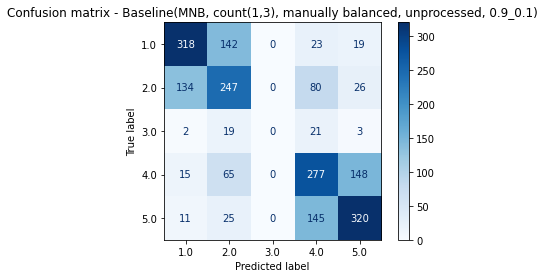

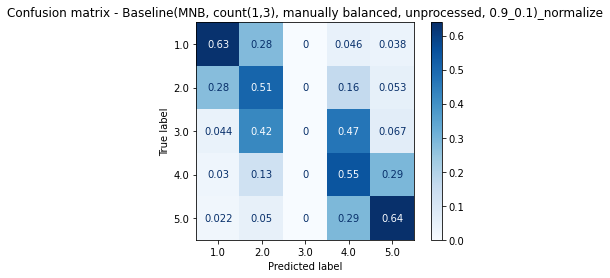

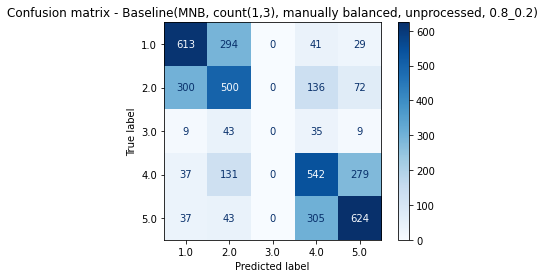

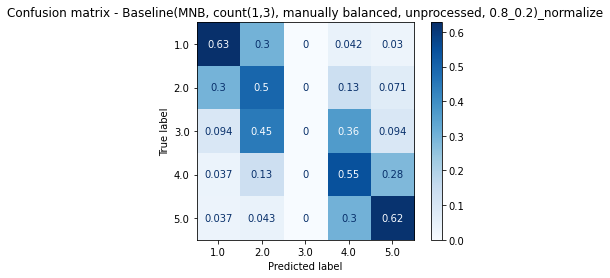

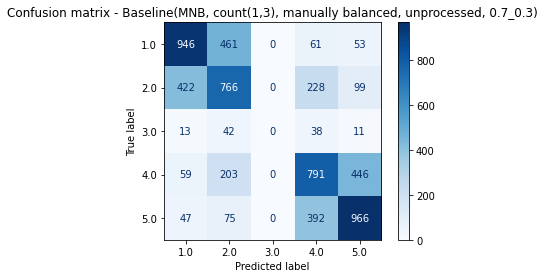

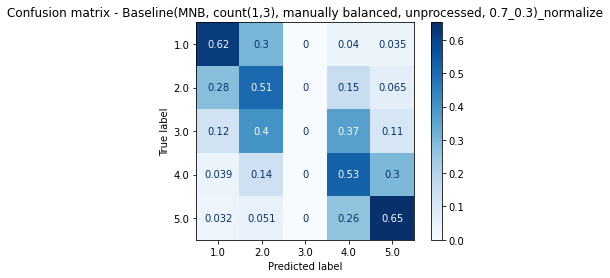

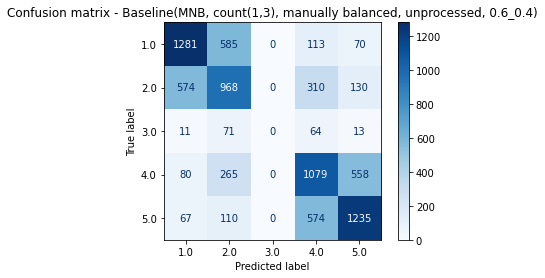

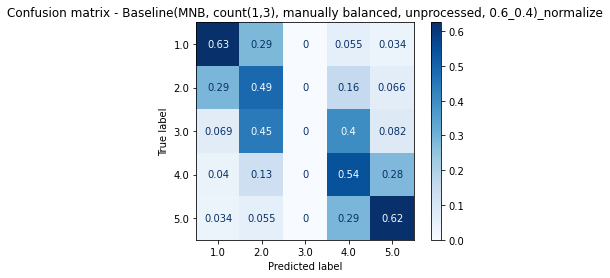

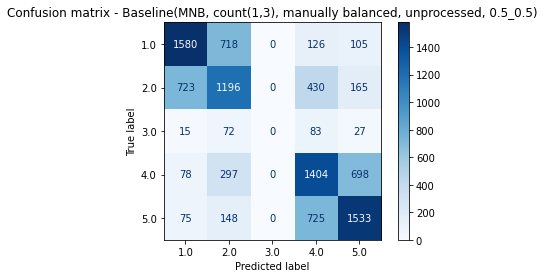

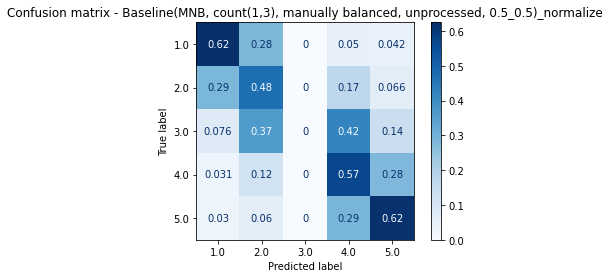

In [123]:
# cv = CountVectorizer(min_df=3, max_df=0.8, ngram_range=(1,5))

# clf = MultinomialNB()
# w = {1:2, 2:3, 3: 2, 4: 2, 5: 1 }
clf = LogisticRegression(dual=False, random_state=0, solver='lbfgs', multi_class='multinomial')
# clf = SVC(decision_function_shape="ovo")
# clf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)


list_test = [0.1, 0.2, 0.3, 0.4, 0.5]
for i in list_test:
    # Split dataset into training set and test set
    test_size = i
    train_size = 1 - i
    X_train, X_test, y_train, y_test = train_test_split(clean_text, target, test_size=i,random_state=None)

    vectorizer = TfidfVectorizer(min_df=5 , norm='l2', max_df=0.8, use_idf=True,sublinear_tf=True, ngram_range=(1,3))
    # vectorizer = CountVectorizer(min_df=5 ,max_df=0.8, ngram_range=(1,3))

    train_vectorized = vectorizer.fit_transform(X_train)
    vocab = vectorizer.get_feature_names()

    print ("Feature size of TF-IDF: ", len(vocab))
    test_vectorized = vectorizer.transform(X_test)

    vectorizer_chi2 = SelectKBest(score_func=f_regression,k=3500)

    chi_train_vectorized = vectorizer_chi2.fit_transform(train_vectorized,y_train)
    chi_test_vectorized = vectorizer_chi2.transform(test_vectorized)

    # Train the model using the training sets
    # nb.fit(X_train, y_train)
    clf.fit(chi_train_vectorized, y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(chi_test_vectorized)

    print("Training and prediction done")
    print('Training target statistics: {}'.format(Counter(y_train), sorted(y_train)))
    print('Testing target statistics: {}'.format(Counter(y_test), sorted(y_test)))

    # Model Accuracy, how often is the classifier correct?
    print("train: " + str(train_size) + "/ test: " + str(test_size))
    accuracy = str(metrics.accuracy_score(y_test, y_pred))
    precision = str(metrics.precision_score(y_test, y_pred, average="macro"))
    f1 = str(metrics.f1_score(y_test, y_pred, average="macro"))
    print("Accuracy:" + accuracy)
    print("Precision:" + precision)
    print("F1:" + f1)
    print(pd.crosstab(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred, labels = [1.0, 2.0, 3.0, 4.0, 5.0]))

    # Visualization of Confusion Matrix and saving
    plt.rcParams['figure.facecolor'] = 'white'
    title = f"Confusion matrix - Baseline(MNB, count(1,3), manually balanced, unprocessed, {train_size}_{test_size})"
    disp = plot_confusion_matrix(clf, chi_test_vectorized, y_test,
                                 display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)
    plt.show()

    title_norm = title + "_normalize"
    disp_norm = plot_confusion_matrix(clf, chi_test_vectorized, y_test,
                                 display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    disp_norm.ax_.set_title(title_norm)
    plt.show()

In [111]:
import fasttext
model = fasttext.train_supervised(X_train, y_train)

TypeError: (): incompatible function arguments. The following argument types are supported:
    1. (self: fasttext_pybind.args, arg0: str) -> None

Invoked with: <fasttext_pybind.args object at 0x000002439ECB0530>, 3005    great stylu price well made great size howev f...
989     item less six month flap cover plug port loos ...
306     not like look like someon print imag look real...
10      work phone second dead plug littl light say ch...
14      case block servic phone second put went full r...
                              ...                        
1033    cute but bow broke easili clean break abl glue...
3264    case cutest case swear but downfal gem bow fal...
1653    back day iphon g bought white slider case exce...
2607    receiv item earlier estim fit well iphon altho...
2732    brought go second car would not carri one car ...
Length: 3296, dtype: object

In [52]:
# Get Top 10 most correlating Features after Feature Selection
import numpy as np
np.asarray(vectorizer.get_feature_names())[vectorizer_fs.get_support()]
top_ranked_features = sorted(enumerate(vectorizer_fs.scores_),key=lambda x:x[1])[:100]
top_ranked_features_indices = list(map(list,zip(*top_ranked_features)))[0]
for feature_pvalue in zip(np.asarray(vectorizer.get_feature_names())[top_ranked_features_indices], vectorizer_fs.pvalues_[top_ranked_features_indices]):
    print(feature_pvalue)

('bought', 0.9981491825540239)
('cost', 0.9963222710222583)
('droid razr', 0.9958271281421842)
('lanyard', 0.9953480456119088)
('wobbl', 0.9941658908887401)
('bent', 0.9938657292431957)
('track', 0.9935138959133556)
('problem case', 0.9930936320426806)
('put case', 0.9930936320426806)
('strength', 0.9930936320426806)
('scuff', 0.9930936320426806)
('case bought', 0.9925794269176652)
('case pretti', 0.9925794269176652)
('charg one', 0.9925794269176652)
('present', 0.9925794269176652)
('qualiti not', 0.9925794269176652)
('label', 0.9925794269176652)
('make look', 0.9925794269176652)
('button hard', 0.9925794269176652)
('buy not', 0.9925794269176652)
('distanc', 0.9925794269176652)
('feel case', 0.9925794269176652)
('worn', 0.9925794269176652)
('time not', 0.99241854672863)
('waterproof', 0.9911687327202104)
('claim', 0.9910737803852644)
('sold', 0.9908134588569804)
('across', 0.9905289469015298)
('anti', 0.9885895154443333)
('market', 0.9885608204770294)
('silver', 0.986487821448846)
('st

In [96]:
print(features_df_new[0])
# print(mask[])
# print(vectorizer.get_feature_names()[0])

  (0, 828)	1
  (0, 1809)	2
  (0, 1844)	1
  (0, 2301)	1
  (0, 2722)	1
  (0, 3636)	1
  (0, 3640)	1
  (0, 4100)	1
  (0, 4105)	1
  (0, 4148)	1
  (0, 4488)	1
  (0, 4800)	3
  (0, 4829)	2


In [ ]:
print('Training target statistics: {}'.format(Counter(target), sorted(target)))

In [ ]:
from sklearn.metrics import roc_curve, auc

c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\line

LR: 0.101679 (0.019189)
SDG: 0.110787 (0.017562)
LDA: nan (nan)
KNN: 0.051094 (0.033612)
CART: 0.065266 (0.020119)
MNB: 0.095909 (0.029013)
GNB: nan (nan)
RND: 0.034284 (0.033776)
SVM: 0.107078 (0.019566)
SVC: 0.012104 (0.017494)


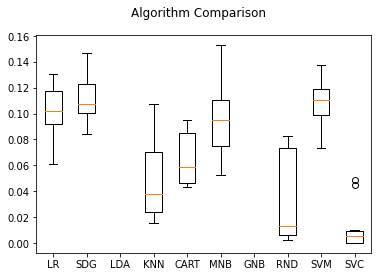

In [111]:
models = []
models.append(('LR', LogisticRegression(dual=False, random_state=10, multi_class="multinomial")))
models.append(('SDG', SGDClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('MNB', MultinomialNB()))
models.append(('GNB', GaussianNB()))
models.append(('RND', RandomForestClassifier()))
models.append(('SVM', LinearSVC(multi_class="crammer_singer")))
models.append(('SVC', SVC(decision_function_shape='ovr')))

results = []
names = []
scoring = 'f1_macro'
vectorizer = CountVectorizer(min_df=2 ,max_df=0.8, ngram_range=(1,3))
text_vectorized = vectorizer.fit_transform(clean_text)
# vectorizer_chi2 = SelectKBest(chi2,k=3000)
vectorizer_chi2 = SelectKBest(score_func=f_classif, k=3500)
chi_text_vectorized = vectorizer_chi2.fit_transform(text_vectorized,target)
seed = 7
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, chi_text_vectorized, target, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()